# Will the Customer Accept the Coupon?

## Context: 

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

## Approach

To better perform an apples-to-apples comparison of coupon takers, a metric called "Take Rate" was created.  This is defined as the percentage of respondents who picked the coupon. Numerator is defined as respondents Y=1, denominator is count of coupon (Y=0 or 1)

In [165]:
# Set up all module imports and data loads

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

data = pd.read_csv('data/coupons.csv')

In [166]:
# Create a counter for total coupons
data = data.assign(Coupon_count=1)

# Rename 'Y' to something more meaningful
data = data.rename(columns={'Y': 'Coupon_taker'})

data.head(5)

# Note:  Take rate is defined as:  Coupon_taker / Coupon_count

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon_taker,Coupon_count
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,1


### Observation 1
From a demographic standpoint, the top coupon takers are as follows:

1. 88.24% of 50+ year old, divorced males
2. 84.09% of 31 year old unmarried partner males
3. 73% of 41 year old single males


In [167]:

o1 = data.groupby(['age', 'maritalStatus','gender']).agg({'Coupon_taker':'sum','Coupon_count':sum})

o1.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o1.sort_values(by=['Take_Rate'], ascending=False).head(3)


,,,Coupon_taker,Coupon_count,Take_Rate
age,maritalStatus,gender,,,
50plus,Divorced,Male,30,34,0.882353
31,Unmarried partner,Male,37,44,0.840909
41,Single,Male,73,100,0.730000


### Observation 2

Except for the 26 year old age group, there are more coupon takers in males at an average of 59.08%.  The rate is lower by 4.35 percentage points for females.


In [168]:
o2 = data.groupby(['gender']).agg({'Coupon_taker':'sum','Coupon_count':sum})
o2.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o2.reset_index('gender')

o2=o2.sort_values(by=['Take_Rate'], ascending=False)
o2


,Coupon_taker,Coupon_count,Take_Rate
gender,,,
Male,3647,6173,0.590799
Female,3563,6511,0.547228


In [169]:
o2c=o2["Take_Rate"]
fig = px.bar(o2c, title = 'Coupon Take Rate by Gender', text_auto=True)
fig.show()

### Observation 3
There is a higher propensity of taking the coupon for respondents who are not going to an urgent place (destination) when they are alone or with friends.

In [130]:
o3 = data.groupby(['destination', 'passanger']).agg({'Coupon_taker':'sum','Coupon_count':sum})
o3.reset_index(['destination', 'passanger'])
o3.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o3.sort_values(by=['Take_Rate'], ascending=False)


Coupon_taker  Coupon_count  Take_Rate
destination     passanger                                       
No Urgent Place Friend(s)          2221          3298   0.673438
                Alone               817          1299   0.628945
                Partner             491           816   0.601716
Home            Partner             149           259   0.575290
No Urgent Place Kid(s)              453           870   0.520690
Home            Alone              1435          2842   0.504926
Work            Alone              1589          3164   0.502212
Home            Kid(s)               55           136   0.404412

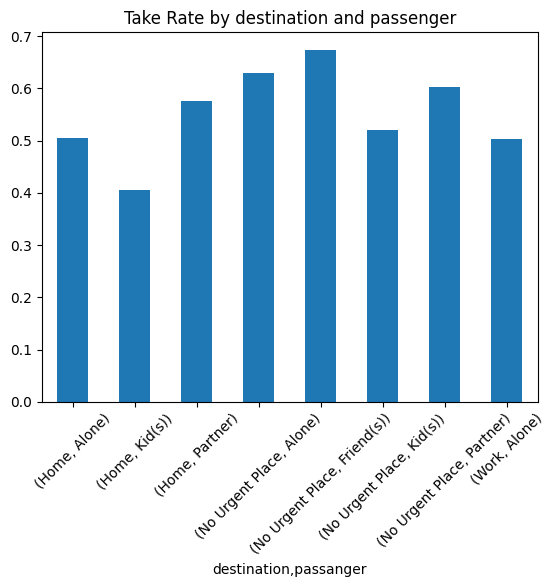

In [145]:
o3c=o3["Take_Rate"]

ax = o3c.plot.bar(rot=45, title = "Take Rate by destination and passenger")


# plt.bar(o3['destination','passanger'], o3['Take_Rate'])
# plt.show()

### Observation 4
There is also a significant take rate at when the person is not going to an urgent place at the hours between 10am and 6pm (around 60% to 66%)

In [148]:
o4 = data.groupby(['destination', 'time']).agg({'Coupon_taker':'sum','Coupon_count':sum})

o4.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o4.sort_values(by=['Take_Rate'], ascending=False)

Coupon_taker  Coupon_count  Take_Rate
destination     time                                       
No Urgent Place 6PM            734          1107   0.663053
                2PM           1329          2009   0.661523
                10AM          1384          2275   0.608352
                10PM           535           892   0.599776
Home            6PM           1154          2123   0.543570
Work            7AM           1589          3164   0.502212
Home            10PM           485          1114   0.435368

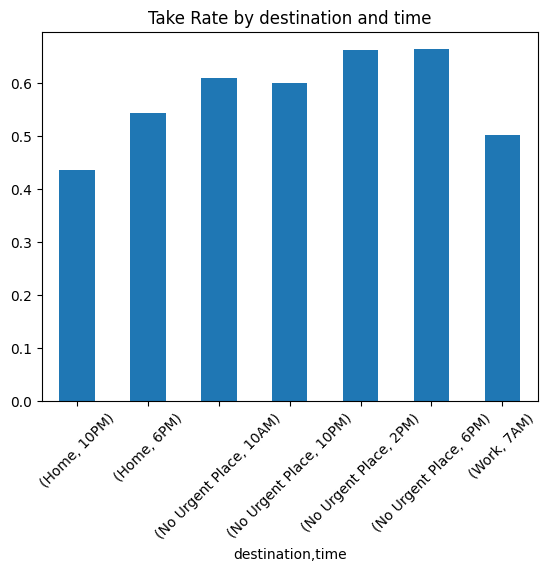

In [160]:
o4c=o4["Take_Rate"]

ax = o4c.plot.bar(rot=45, title = "Take Rate by destination and time")


# plt.bar(o3['destination','passanger'], o3['Take_Rate'])
# plt.show()

### Observation 5
Income also plays a part, where the top 2 takers are respondents with income of 50k to 62.5k (59.55%), 25k-37.5k (59.31%) and <12.5k (59.31%).  Less than half of 75k to 87.5k earners (48.31%) take the coupon.

In [51]:
o5 = data.groupby(['income']).agg({'Coupon_taker':'sum','Coupon_count':sum})

o5.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o5.sort_values(by=['Take_Rate'], ascending=False)

,Coupon_taker,Coupon_count,Take_Rate
income,,,
$50000 - $62499,988,1659,0.595539
$25000 - $37499,1194,2013,0.593145
Less than $12500,618,1042,0.593090
$100000 or More,1004,1736,0.578341
$12500 - $24999,1052,1831,0.574549
$37500 - $49999,1018,1805,0.563989
$87500 - $99999,476,895,0.531844
$62500 - $74999,446,846,0.527187
$75000 - $87499,414,857,0.483081


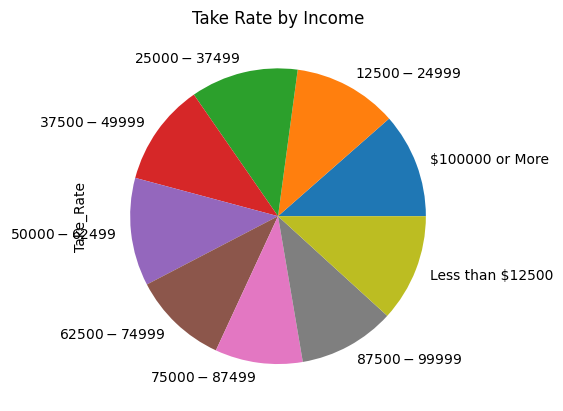

In [150]:
o5c=o5["Take_Rate"]

ax = o5c.plot.pie(rot=45, title = "Take Rate by Income")


### Observation 6
There is a significant take rate a day before coupon expiration 62.56% vs 49.6% for 2 hours. This is more prevalent if the respondent has no urgent place to go.


In [52]:
#Expiration only
o6a = data.groupby(['expiration']).agg({'Coupon_taker':'sum','Coupon_count':sum})
o6a.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o6a.sort_values(by=['Take_Rate'], ascending=False)

,Coupon_taker,Coupon_count,Take_Rate
expiration,,,
1d,4436,7091,0.625582
2h,2774,5593,0.495977


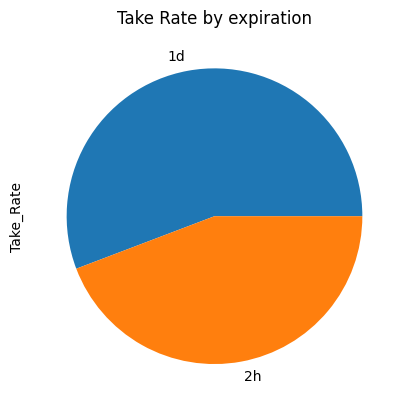

In [154]:
o6ac=o6a["Take_Rate"]

ax = o6ac.plot.pie(rot=45, title = "Take Rate by expiration")


In [53]:
#Destination with expiration
o6 = data.groupby(['destination', 'expiration']).agg({'Coupon_taker':'sum','Coupon_count':sum})
o6.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o6.sort_values(by=['Take_Rate'], ascending=False)

Coupon_taker  Coupon_count  Take_Rate
destination     expiration                                       
No Urgent Place 1d                  2237          3326   0.672580
                2h                  1745          2957   0.590125
Home            1d                  1071          1830   0.585246
Work            1d                  1128          1935   0.582946
Home            2h                   568          1407   0.403696
Work            2h                   461          1229   0.375102

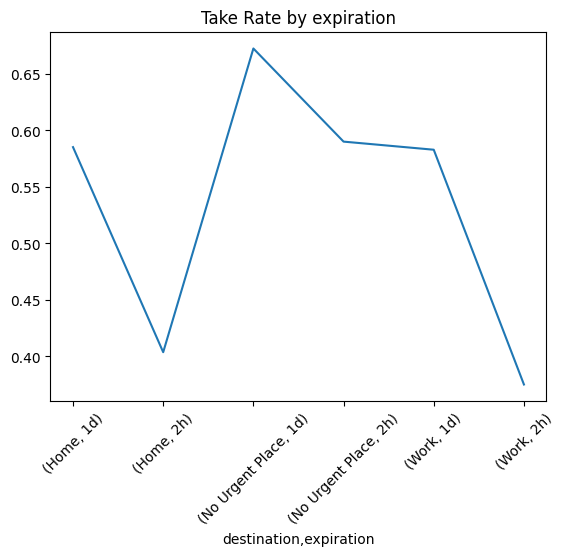

In [156]:
o6c=o6["Take_Rate"]

ax = o6c.plot.line(rot=45, title = "Take Rate by expiration")


### Observation 7
Based on weather and temperature, there are is a higher take rate when it's Sunny (59.48%).  Specifically cold (30 degrees) and warm (80 degrees) with 62.46% and 60.03% respectively.  There is a less than 50% chance for snowy and rainy weather.

In [54]:
#Weather only
o7 = data.groupby(['weather']).agg({'Coupon_taker':'sum','Coupon_count':sum})
o7.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o7.sort_values(by=['Take_Rate'], ascending=False)

,Coupon_taker,Coupon_count,Take_Rate
weather,,,
Sunny,5989,10069,0.594796
Snowy,661,1405,0.470463
Rainy,560,1210,0.462810


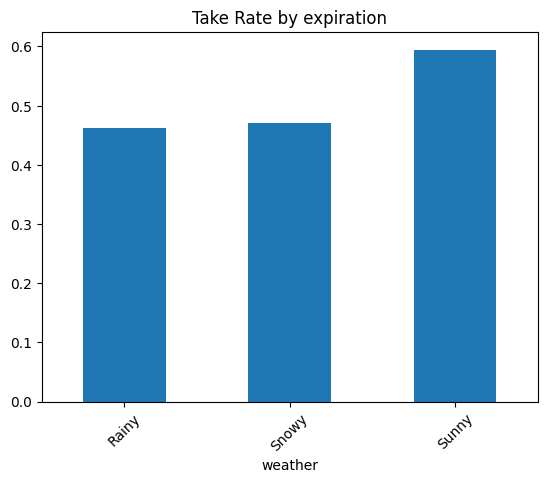

In [163]:
o7c=o7["Take_Rate"]

ax = o7c.plot.bar(rot=45, title = "Take Rate by expiration")


In [55]:
# Weather and temperature
o7a = data.groupby(['weather', 'temperature']).agg({'Coupon_taker':'sum','Coupon_count':sum})
o7a.eval('Take_Rate = (Coupon_taker / Coupon_count) ', inplace=True)
o7a.sort_values(by=['Take_Rate'], ascending=False)

Coupon_taker  Coupon_count  Take_Rate
weather temperature                                       
Sunny   30                    569           911   0.624588
        80                   3919          6528   0.600337
        55                   1501          2630   0.570722
Snowy   30                    661          1405   0.470463
Rainy   55                    560          1210   0.462810

### Recommendations for higher take rate:

1.  Set coupon expiration to at least a day.
2.  Schedule marketing efforts for these coupons when there is a predicted chance of sunny weather.
3.  Market the coupons during "off-peak" hours when the person is not known to be going to home nor work.  This works best in the top 3 time slots of 6pm, 2pm and 10am. 
4.  Across gender, there is approximately a 5-point gap for males vs females.  Marketing allocation may need to reflect this proportion.
5.  Since all the age groups show greater than 50% take rates, marketing allocation may need to reflect the same proportion.